In [65]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [66]:
data_train = pd.read_csv("sign_mnist_train/sign_mnist_train.csv")
data_test = pd.read_csv("sign_mnist_test/sign_mnist_test.csv")
dict_signes = [
            "A","B","C","D","E","F",
            "G","H","I","J","K","L",
            "M","N","O","P","Q","R",
            "S","T","U","V","W","X","Y"]

In [67]:
X = data_train.values[:,1:]
Y = data_train.values[:,0]



In [68]:
X_test = data_train.values[:,1:]
Y_test = data_train.values[:,0]

In [69]:
X = X.reshape(-1,28,28,1)
X = X/255

In [70]:
X_test = X_test.reshape(-1,28,28,1)
X_test = X_test/255

In [5]:
x_train , x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33 , random_state  = 42)

In [6]:
y_train.shape

(18394,)

In [9]:
model = Sequential()
model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 input_shape = (28,28,1),
                 activation="relu"))

model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 activation="relu"))

model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 activation = "relu"))

model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 activation = "relu"))

model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 activation = "relu"))

model.add(MaxPool2D())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units = 512, activation = "sigmoid"))
model.add(Dense(units = 25 , activation ="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)         

In [10]:
model.compile(optimizer="adam" , loss = "sparse_categorical_crossentropy",metrics=["acc"])
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir)
history = model.fit(x=x_train, 
          y=y_train, 
          epochs=50, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Train on 18394 samples, validate on 9061 samples
Epoch 1/50
18394/18394 [==============================] - 19s 1ms/sample - loss: 1.8284 - acc: 0.4296 - val_loss: 0.6970 - val_acc: 0.7799
Epoch 2/50
18394/18394 [==============================] - 18s 999us/sample - loss: 0.7313 - acc: 0.7569 - val_loss: 0.2476 - val_acc: 0.9374
Epoch 3/50
18394/18394 [==============================] - 19s 1ms/sample - loss: 0.4586 - acc: 0.8507 - val_loss: 0.1256 - val_acc: 0.9681
Epoch 4/50
18394/18394 [==============================] - 19s 1ms/sample - loss: 0.3169 - acc: 0.8991 - val_loss: 0.0540 - val_acc: 0.9923
Epoch 5/50
18394/18394 [==============================] - 18s 977us/sample - loss: 0.2418 - acc: 0.9264 - val_loss: 0.0308 - val_acc: 0.9988
Epoch 6/50
18394/18394 [==============================] - 18s 1ms/sample - loss: 0.1854 - acc: 0.9426 - val_loss: 0.0219 - val_acc: 0.9972
Epoch 7/50
18394/18394 [==============================] - 18s 980us/sample - loss: 0.1567 - acc: 0.9519 - val_los

In [39]:
model.save("model.h5")

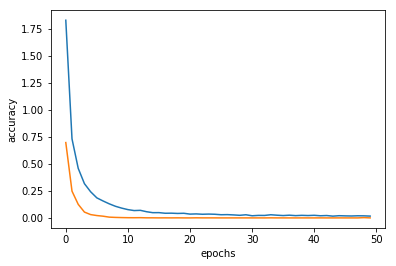

In [76]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

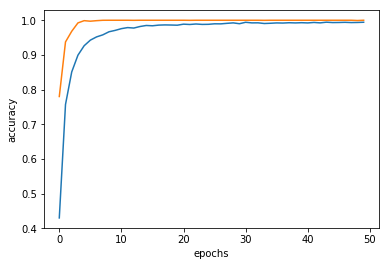

In [77]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [74]:
accuracy_score(Y_test,model.predict_classes(X_test))

1.0

In [121]:
def plot_image(i,prediction_array,true_label,img):
    prediction_array,true_label,img = predict[i],Y_test[i],X_test[i,:,:,0]
    plt.grid("False")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predict_label = np.argmax(prediction_array)
    if(predict_label == true_label):
        color = "Blue"
    else:
        color = "red"
        
    plt.xlabel("{} {} ({})".format(dict_signes[predict_label],
                                       100*np.max(prediction_array),
                                       dict_signes[true_label],color=color))

def plot_value_array(i, predictions_array, true_label):
  predictions_array , true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(25), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(range(25), dict_signes, rotation=45)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [118]:
predict = model.predict(X_test)


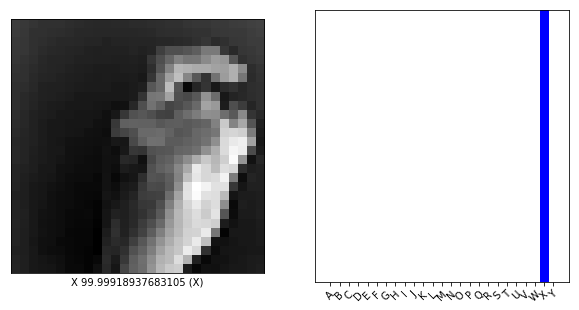

In [128]:
i = 88
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i,predict,Y_test,X_test)
plt.subplot(1,2,2)
plot_value_array(i,predict,Y_test)
plt.show()